In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils import *


class AutoEncoder(tf.keras.Model):
    def __init__(self, input_shape=(28, 28, 1)):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=input_shape),
                tf.keras.layers.Conv2D(
                    16, (3, 3), activation="relu", padding="same", strides=2
                ),
                tf.keras.layers.Conv2D(
                    8, (3, 3), activation="relu", padding="same", strides=2
                ),
            ]
        )
        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.Conv2DTranspose(
                    8, kernel_size=3, strides=2, activation="relu", padding="same"
                ),
                tf.keras.layers.Conv2DTranspose(
                    16, kernel_size=3, strides=2, activation="relu", padding="same"
                ),
                tf.keras.layers.Conv2D(
                    1, kernel_size=(3, 3), activation="sigmoid", padding="same"
                ),
            ]
        )

    def decode(self, x):
        return self.decoder(x)

    def encode(self, x):
        return self.encoder(x)

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def summary(self):
        self.encoder.summary()
        self.decoder.summary()

In [2]:
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9
fashion_mnist = tf.keras.datasets.fashion_mnist  # 28x28 images of clothing items

(x_train1, y_train), (x_test1, y_test) = mnist.load_data()
x_train1 = x_train1 / 255.0  # normalize pixel values to be between 0 and 1
x_test1 = x_test1 / 255.0

In [3]:
model1 = AutoEncoder()
model1.compile(optimizer="adam", loss="mse")
model1.fit(
    x_train1, x_train1, epochs=10, shuffle=True, validation_data=(x_test1, x_test1)
)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0115 - val_loss: 0.0019
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 9.7892e-04 - val_loss: 9.2148e-04
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 9.2297e-04 - val_loss: 8.8185e-04
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 8.8900e-04 - val_loss: 8.6395e-04
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 8.6605e-04 - val_loss: 8.5541e-04
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 8.4838e-04 - val_loss: 8.1981e-04
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 8.3354e-04 - val_loss: 8.1359e-04
Epoch 10/10
1875/1875 [==

In [4]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                      

1/1 [==============================] - 0s 189ms/step


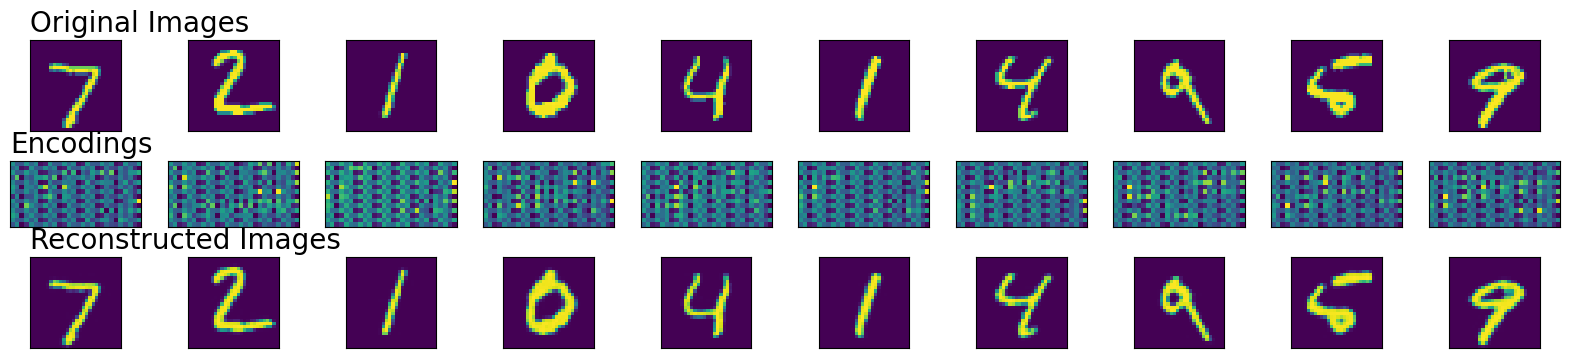

In [5]:
plot_reconstructed_images_and_encodings(
    x_test1[:10],
    tf.reshape(model1.encode(x_test1[:10]), (10, 14, -1)),
    model1.predict(x_test1[:10]),
)

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0  # normalize pixel values to be between 0 and 1
x_test = x_test / 255.0
model2 = AutoEncoder(input_shape=(28, 28, 1))
model2.compile(optimizer="adam", loss="mse")
model2.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0126 - val_loss: 0.0050
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

In [7]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                    

1/1 [==============================] - 0s 296ms/step


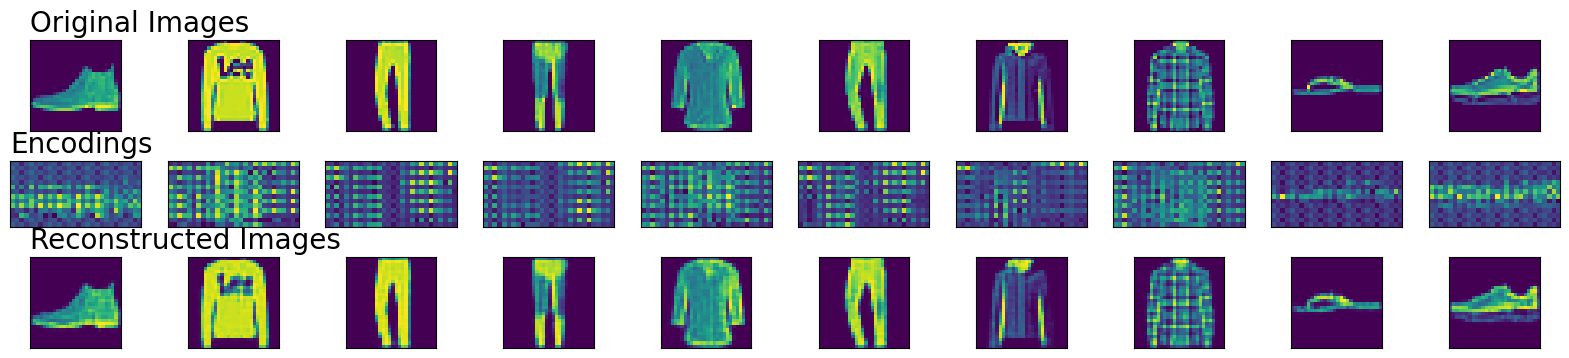

In [8]:
plot_reconstructed_images_and_encodings(
    x_test[:10],
    tf.reshape(model2.encode(x_test[:10]), (10, 14, -1)),
    model2.predict(x_test[:10]),
)

1/1 [==============================] - 0s 31ms/step


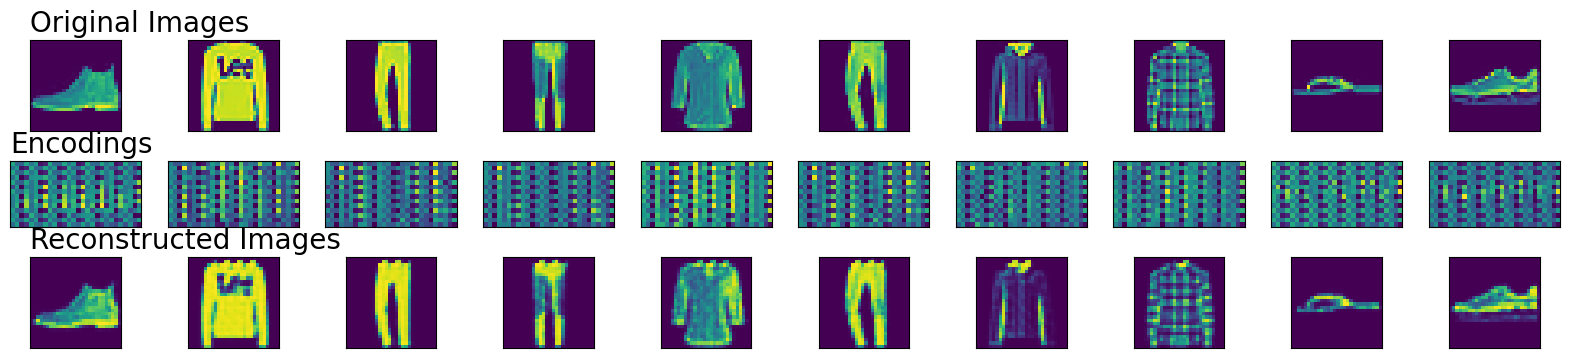

In [9]:
plot_reconstructed_images_and_encodings(
    x_test[:10],
    tf.reshape(model1.encode(x_test[:10]), (10, 14, -1)),
    model1.predict(x_test[:10]),
)

In [10]:
model1.evaluate(x_test, x_test)  # digit model on fashion data

313/313 [==============================] - 2s 5ms/step - loss: 0.0097


0.009733742102980614

In [11]:
model2.evaluate(x_test1, x_test1)  # fashion model on digit data

313/313 [==============================] - 1s 4ms/step - loss: 0.0013


0.0012959183659404516

1/1 [==============================] - 0s 28ms/step


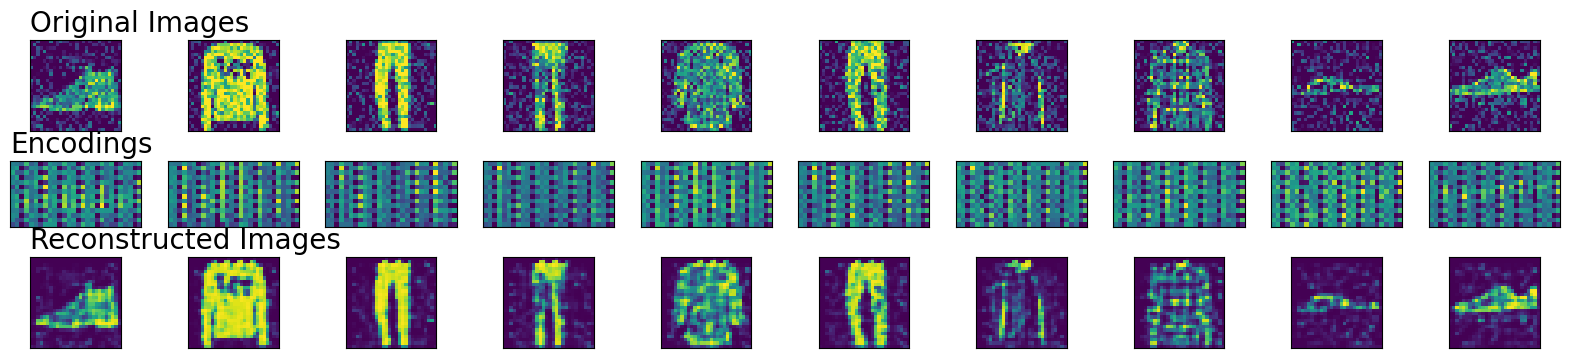

In [13]:
plot_reconstructed_images_and_encodings(
    noisified_x_test := noisify(x_test[:10], "static"),
    tf.reshape(model1.encode(noisified_x_test[:10]), (10, 14, -1)),
    model1.predict(noisified_x_test[:10]),
)

1/1 [==============================] - 0s 38ms/step


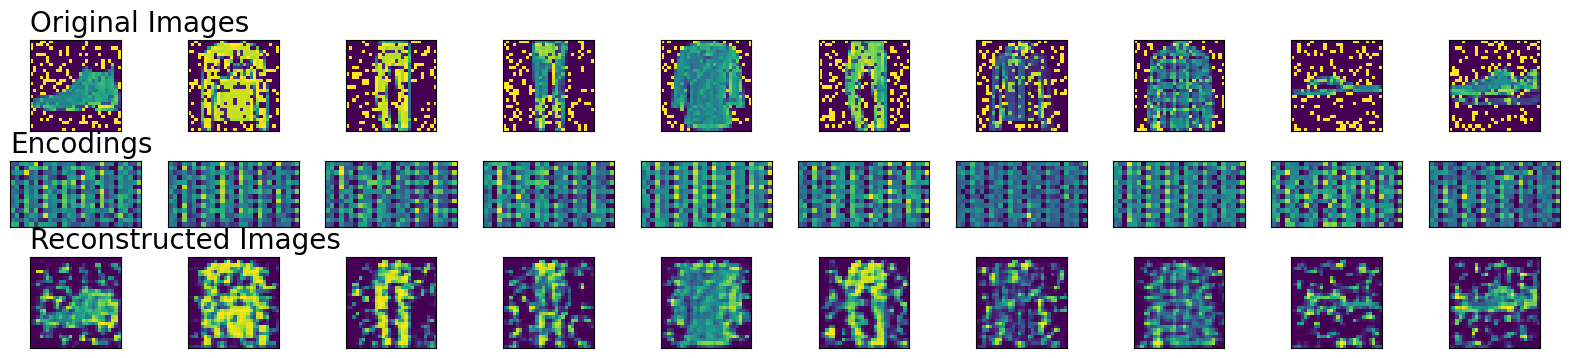

In [14]:
plot_reconstructed_images_and_encodings(
    noisified_x_test := noisify(x_test[:10], "b&p"),
    tf.reshape(model1.encode(noisified_x_test[:10]), (10, 14, -1)),
    model1.predict(noisified_x_test[:10]),
)